# Network with No Hidden Layers
In this File,we run the default network to test combinations for obtaining best accuracy.

We run the Training algorith for 27000 Iterations with a Learning rate of 0.001 to get the best training accuracy of 95.8% and an accuracy of 94% on the Test Set.

In [1]:
import matplotlib
matplotlib.use('Agg')
from __future__ import division
import tensorflow as tf
import numpy as np
import tarfile
import os
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [2]:
def csv_to_numpy_array(filePath, delimiter):
    return np.genfromtxt(filePath, delimiter=delimiter, dtype=None)
def import_data():
    if "data" not in os.listdir(os.getcwd()):
        # Untar directory of data if we haven't already
        tarObject = tarfile.open("data.tar.gz")
        tarObject.extractall()
        tarObject.close()
        print("Extracted tar to current directory")
    else:
        # we've already extracted the files
        pass
    print("loading training data")
    trainX = csv_to_numpy_array("data/trainX.csv", delimiter="\t")
    trainY = csv_to_numpy_array("data/trainY.csv", delimiter="\t")
    print("loading test data")
    testX = csv_to_numpy_array("data/testX.csv", delimiter="\t")
    testY = csv_to_numpy_array("data/testY.csv", delimiter="\t")
    return trainX,trainY,testX,testY
trainX,trainY,testX,testY = import_data()

loading training data
loading test data


In [3]:
numFeatures = trainX.shape[1]
numLabels = trainY.shape[1]
numEpochs = 27000
learningRate = tf.train.exponential_decay(learning_rate=0.001,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)
print(numFeatures)

2955


In [4]:
X = tf.placeholder(tf.float32, [None, numFeatures])
yGold = tf.placeholder(tf.float32, [None, numLabels])

In [5]:
weights = tf.Variable(tf.random_normal([numFeatures,numLabels],
                                       mean=0,
                                       stddev=(np.sqrt(6/numFeatures+
                                                         numLabels+1)),
                                       name="weights"))
bias = tf.Variable(tf.random_normal([1,numLabels],
                                    mean=0,
                                    stddev=(np.sqrt(6/numFeatures+numLabels+1)),
                                    name="bias"))

In [6]:
init_OP = tf.initialize_all_variables()
apply_weights_OP = tf.matmul(X, weights, name="apply_weights")
add_bias_OP = tf.add(apply_weights_OP, bias, name="add_bias") 
activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")

In [7]:
cost_OP = tf.nn.l2_loss(activation_OP-yGold, name="squared_error_cost")
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)

In [8]:
epoch_values=[]
accuracy_values=[]
cost_values=[]
plt.ion()
fig = plt.figure()
#ax1 = plt.subplot("211")
#ax1.set_title("TRAINING ACCURACY", fontsize=18)
#ax2 = plt.subplot("212")
#ax2.set_title("TRAINING COST", fontsize=18)
#plt.tight_layout()

0.466946
0.551941
0.552991
0.559286
0.565582
0.56978
0.572928
0.577125
0.586569
0.591815
0.596013
0.608604
0.616999
0.625394
0.632739
0.645331
0.657922
0.66212
0.667366
0.684155
0.699895
0.712487
0.720881
0.730325
0.735572
0.742917
0.749213
0.760755
0.768101
0.771249
0.776495
0.78489
0.791186
0.794334
0.795383
0.798531
0.803778
0.807975
0.809024
0.811123
0.812172
0.81532
0.818468
0.822665
0.833158
0.838405
0.842602
0.842602
0.8468
0.8468
0.849948
0.852046
0.856243
0.859391
0.86149
0.863589
0.863589
0.868835
0.869885
0.873033
0.878279
0.881427
0.885624
0.887723
0.89192
0.894019
0.897167
0.897167
0.898216
0.898216
0.900315
0.901364
0.902413
0.904512
0.904512
0.905561
0.906611
0.90766
0.908709
0.910808
0.911857
0.911857
0.911857
0.913956
0.913956
0.913956
0.913956
0.913956
0.915005
0.915005
0.915005
0.917104
0.918153
0.918153
0.918153
0.919203
0.920252
0.920252
0.921301
0.9234
0.9234
0.924449
0.925498
0.926548
0.926548
0.926548
0.927597
0.927597
0.930745
0.930745
0.931794
0.932844
0.93494

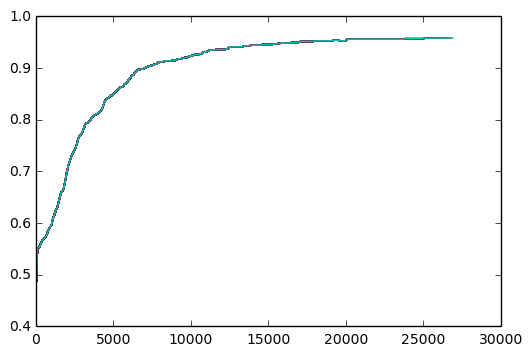

In [9]:
sess = tf.Session()
sess.run(init_OP)
correct_predictions_OP = tf.equal(tf.argmax(activation_OP,1),tf.argmax(yGold,1))
accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, "float"))
activation_summary_OP = tf.histogram_summary("output", activation_OP)
accuracy_summary_OP = tf.scalar_summary("accuracy", accuracy_OP)
cost_summary_OP = tf.scalar_summary("cost", cost_OP)
weightSummary = tf.histogram_summary("weights", weights.eval(session=sess))
biasSummary = tf.histogram_summary("biases", bias.eval(session=sess))
all_summary_OPS = tf.merge_all_summaries()
writer = tf.train.SummaryWriter("summary_logs", sess.graph)
# Initialize reporting variables
cost = 0
diff = 1
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in cost %g; convergence."%diff)
        break
    else:
        # Run training step
        step = sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
        if i % 100 == 0:
            epoch_values.append(i)
            #summary_results = sess.run(all_summary_OPS, feed_dict = {X:trainX, yGold: trainY})
            train_accuracy = sess.run(accuracy_OP, feed_dict={X: trainX, yGold: trainY})
            newCost = sess.run(cost_OP, feed_dict={X: trainX, yGold: trainY})
            accuracy_values.append(train_accuracy)
            cost_values.append(newCost)
            diff = abs(newCost - cost)
            cost = newCost    
            #print("step %d, cost %g"%(i, newCost))
            #print("step %d, change in cost %g"%(i, diff))
            accuracyLine, = plt.plot(epoch_values, accuracy_values)
            #costLine, = plt.plot(epoch_values, cost_values)
            print(train_accuracy)
            #fig.canvas.draw()
            #time.sleep(1)            

In [10]:
print("final accuracy on test set: %s" %str(sess.run(accuracy_OP, 
                                                     feed_dict={X: testX, 
                                                                yGold: testY})))

final accuracy on test set: 0.942857
